<a href="https://colab.research.google.com/github/TejaswiGithu/Stock-Price--Exponential-Smoothing-ARIMA-Figs/blob/main/Stock_Price_Exponential_Smoothing_ARIMA_Figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
import pandas_datareader as web

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [4]:
# stock_data = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv',parse_dates=True,index_col='Date')

In [5]:
stock_data = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv')

In [6]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-27,28.299999,32.110001,28.250000,30.020000,30.020000,13079000
1,2021-05-28,30.500000,34.369999,29.500000,34.150002,34.150002,3491000
2,2021-06-01,35.470001,36.090000,30.580000,31.760000,31.760000,4806300
3,2021-06-02,31.760000,32.169998,30.120001,31.809999,31.809999,2479400
4,2021-06-03,31.000000,32.900002,30.770000,31.770000,31.770000,2881600


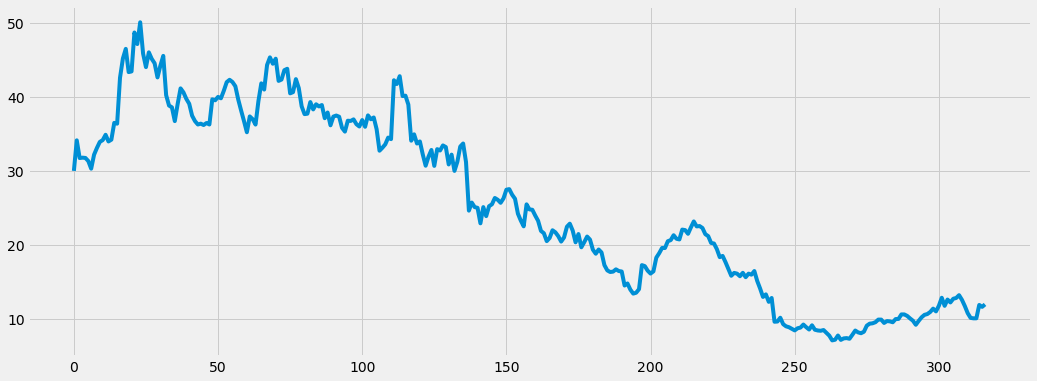

In [7]:
# Plotting the time series.
plt.figure(figsize=(16,6))
plt.plot(stock_data['Close'])
plt.show()

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       317 non-null    object 
 1   Open       317 non-null    float64
 2   High       317 non-null    float64
 3   Low        317 non-null    float64
 4   Close      317 non-null    float64
 5   Adj Close  317 non-null    float64
 6   Volume     317 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.5+ KB


In [9]:
data=stock_data.filter(['Close'])

In [10]:
data

,Close
0,30.020000
1,34.150002
2,31.760000
3,31.809999
4,31.770000
...,...
312,10.100000
313,10.100000
314,11.910000
315,11.650000


In [11]:
dataset=data.values

In [12]:
training_data_len=math.ceil(len(dataset)*0.8)

In [13]:
training_data_len

254

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
scaled_data=scaler.fit_transform(dataset)

In [16]:
scaled_data

array([[0.53280598],
       [0.62889724],
       [0.57328993],
       [0.57445324],
       [0.5735226 ],
       [0.56375061],
       [0.53978597],
       [0.58375989],
       [0.60516524],
       [0.62401117],
       [0.62959519],
       [0.64634721],
       [0.6254072 ],
       [0.63099123],
       [0.68380641],
       [0.68124717],
       [0.82573296],
       [0.88622617],
       [0.91647277],
       [0.84341556],
       [0.84550956],
       [0.96789211],
       [0.93159613],
       [1.        ],
       [0.90158215],
       [0.85900425],
       [0.90553752],
       [0.88506286],
       [0.8711029 ],
       [0.82666365],
       [0.8636576 ],
       [0.89436954],
       [0.77082367],
       [0.73825034],
       [0.73266641],
       [0.68939045],
       [0.74360176],
       [0.79222893],
       [0.77966502],
       [0.75919036],
       [0.74383438],
       [0.70637509],
       [0.68939045],
       [0.67868782],
       [0.68124717],
       [0.67705915],
       [0.68334117],
       [0.678

In [17]:
train_data = scaled_data[:training_data_len]

In [18]:
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.53280598, 0.62889724, 0.57328993, 0.57445324, 0.5735226 ,
       0.56375061, 0.53978597, 0.58375989, 0.60516524, 0.62401117,
       0.62959519, 0.64634721, 0.6254072 , 0.63099123, 0.68380641,
       0.68124717, 0.82573296, 0.88622617, 0.91647277, 0.84341556,
       0.84550956, 0.96789211, 0.93159613, 1.        , 0.90158215,
       0.85900425, 0.90553752, 0.88506286, 0.8711029 , 0.82666365,
       0.8636576 , 0.89436954, 0.77082367, 0.73825034, 0.73266641,
       0.68939045, 0.74360176, 0.79222893, 0.77966502, 0.75919036,
       0.74383438, 0.70637509, 0.68939045, 0.67868782, 0.68124717,
       0.67705915, 0.68334117, 0.67868782, 0.75779433, 0.75476972,
       0.76547235, 0.76105173, 0.78478361, 0.81177291, 0.81921833,
       0.81223826, 0.79897628, 0.75732898, 0.72266174, 0.68939045])]
[0.654257871300971]

[array([0.53280598, 0.62889724, 0.57328993, 0.57445324, 0.5735226 ,
       0.56375061, 0.53978597, 0.58375989, 0.60516524, 0.62401117,
       0.62959519, 0.64634721, 0.6254

In [19]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(194, 60, 1)

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

194/194 [==============================] - 5s 6ms/step - loss: 0.0200


In [24]:
test_data=scaled_data[training_data_len-60:,:]

In [25]:
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [26]:
x_test=np.array(x_test)

In [27]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [28]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [29]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.37942038157629593

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


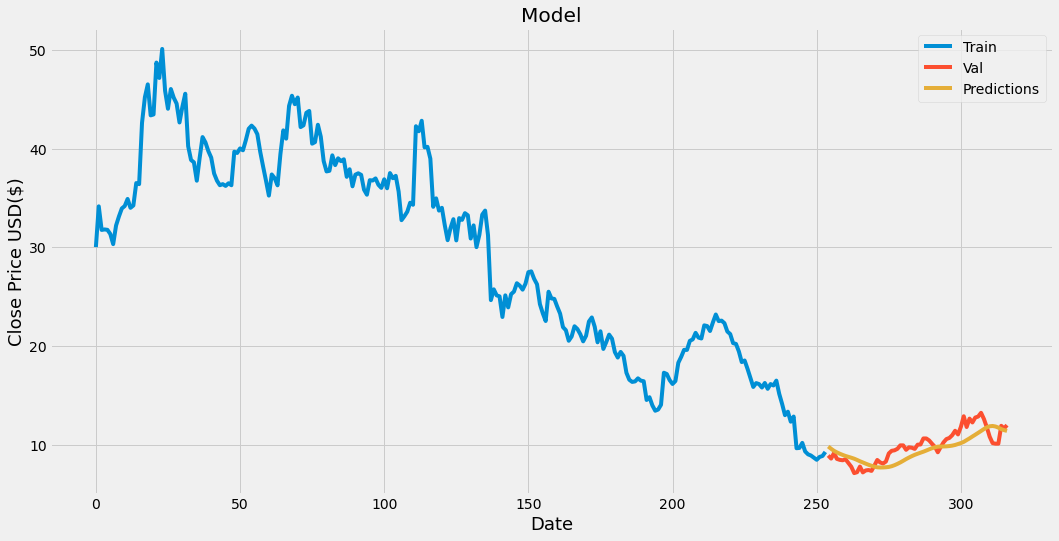

In [30]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='upper right')

In [31]:
valid

,Close,Predictions
254,8.90,9.816530
255,8.59,9.580965
256,9.16,9.375564
257,8.56,9.219857
258,8.46,9.083793
...,...,...
312,10.10,11.841747
313,10.10,11.728832
314,11.91,11.577640
315,11.65,11.472795


In [32]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe using pandas_datareader
figs_quote = pdr.get_data_yahoo("FIGS", start="2019-12-17", end='2022-08-31')

[*********************100%***********************]  1 of 1 completed


In [35]:
figs_quote

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-27,28.299999,32.110001,28.250000,30.020000,30.020000,13079000
2021-05-28,30.500000,34.369999,29.500000,34.150002,34.150002,3491000
2021-06-01,35.470001,36.090000,30.580000,31.760000,31.760000,4806300
2021-06-02,31.760000,32.169998,30.120001,31.809999,31.809999,2479400
2021-06-03,31.000000,32.900002,30.770000,31.770000,31.770000,2881600
...,...,...,...,...,...,...
2022-08-24,10.070000,10.300000,9.950000,10.100000,10.100000,2779700
2022-08-25,10.770000,11.940000,10.450000,11.910000,11.910000,17658200
2022-08-26,11.870000,12.050000,11.420000,11.650000,11.650000,6537100
